# Chapter 1 - Introduction

In [5]:
!pip install -Uqq fastai

zsh:1: command not found: pip


In [2]:
from fastai import collab
import fastai.tabular.all as tabular
import fastai.text.all as text
import fastai.vision.all as vision
import graphviz
import numpy as np
from PIL import Image
import requests

# Image Classification

In [ ]:
def label_cat(file): 
    return file[0].isupper()

PETS_PATH = vision.untar_data(vision.URLs.PETS) / 'images'
image_files = vision.get_image_files(PETS_PATH)

image_data = vision.ImageDataLoaders.from_name_func(
    PETS_PATH, image_files, valid_pct=0.2, seed=42,
    label_func=label_cat, item_tfms=vision.Resize(224)
)

learn = vision.cnn_learner(image_data, vision.resnet34, metrics=vision.error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.173691,0.026920,0.008796,01:02


epoch,train_loss,valid_loss,error_rate,time
0,0.054572,0.025503,0.008119,01:16


In [ ]:
def is_cat(url):
    img = vision.PILImage.create(requests.get(url, stream=True).raw)
    is_cat, _ ,probs = learn.predict(img)
    print(f"Is this a cat?: {is_cat}.")
    print(f"Probability it's a cat: {probs[1].item():.6f}")
    return img.to_thumb(192)

Is this a cat?: True.
Probability it's a cat: 1.000000


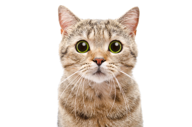

In [ ]:
is_cat('https://static.toiimg.com/photo/msid-67586673/67586673.jpg?3918697')

Is this a cat?: False.
Probability it's a cat: 0.000008


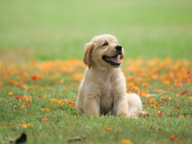

In [ ]:
is_cat('https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg')

# Image Segmentation

In [ ]:
CAMVID_PATH = vision.untar_data(vision.URLs.CAMVID_TINY)

def label_image(file):
    return CAMVID_PATH / 'labels' / f'{file.stem}_P{file.suffix}'

image_files = vision.get_image_files(CAMVID_PATH / 'images')
image_codes = np.loadtxt(CAMVID_PATH / 'codes.txt', dtype=str)

image_data = vision.SegmentationDataLoaders.from_label_func(
    CAMVID_PATH, bs=8, fnames=image_files,
    label_func=label_image,
    codes = image_codes
)

learn = vision.unet_learner(image_data, vision.resnet34)
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,2.874062,2.279612,00:09


epoch,train_loss,valid_loss,time
0,1.828323,1.702051,00:03
1,1.581939,1.458600,00:03
2,1.457175,1.325969,00:03
3,1.347130,1.157308,00:03
4,1.225248,1.078420,00:03
5,1.120662,0.946400,00:03
6,1.018272,0.844149,00:03
7,0.929578,0.825164,00:03
8,0.856481,0.793291,00:03
9,0.797235,0.789923,00:03


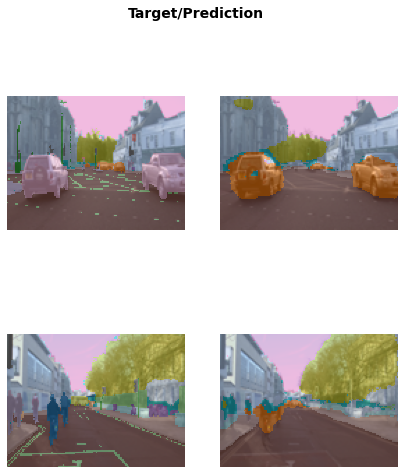

In [ ]:
learn.show_results(figsize=(7,8), max_n=4)

# Text Classification

In [ ]:
IMDB_PATH = text.untar_data(text.URLs.IMDB_SAMPLE)

text_data = text.TextDataLoaders.from_csv(
    IMDB_PATH, csv_fname='texts.csv', label_col='label', text_col='text'
)
learn = text.text_classifier_learner(
    text_data, text.AWD_LSTM, drop_mult=0.5, metrics=text.accuracy
)
learn.fine_tune(4, 1e-2)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


epoch,train_loss,valid_loss,accuracy,time
0,0.630745,0.615465,0.740000,00:12


epoch,train_loss,valid_loss,accuracy,time
0,0.435987,0.527971,0.770000,00:27
1,0.388278,0.495310,0.745000,00:27
2,0.328900,0.391236,0.815000,00:27
3,0.267346,0.397564,0.825000,00:27


In [ ]:
learn.predict("I really liked that movie!")

('positive', tensor(1), tensor([0.1978, 0.8022]))

In [ ]:
learn.predict('that was rubbish')

('negative', tensor(0), tensor([0.9459, 0.0541]))

# Tabular Regression

In [ ]:
TABULAR_PATH = tabular.untar_data(tabular.URLs.ADULT_SAMPLE)

tabular_data = tabular.TabularDataLoaders.from_csv(
    TABULAR_PATH/'adult.csv', path=TABULAR_PATH, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [tabular.Categorify, tabular.FillMissing, tabular.Normalize]
)

learn = tabular.tabular_learner(tabular_data, metrics=tabular.accuracy)
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.361150,0.352909,0.834920,00:07
1,0.354133,0.348965,0.837224,00:07
2,0.352436,0.346098,0.838913,00:07


# Collaborative Filtering

In [ ]:
COLLABORATIVE_PATH = collab.untar_data(collab.URLs.ML_SAMPLE)
collaborative_data = collab.CollabDataLoaders.from_csv(COLLABORATIVE_PATH/'ratings.csv')
learn = collab.collab_learner(collaborative_data, y_range=(0.5,5.5))
learn.fine_tune(10)
learn.show_results()

epoch,train_loss,valid_loss,time
0,1.532109,1.423117,00:00


epoch,train_loss,valid_loss,time
0,1.379574,1.364196,00:00
1,1.270791,1.185482,00:00
2,1.026153,0.884104,00:00
3,0.800939,0.743624,00:00
4,0.687624,0.709776,00:00
5,0.645728,0.697502,00:00
6,0.618972,0.692991,00:00
7,0.611729,0.690354,00:00
8,0.611530,0.689645,00:00
9,0.602947,0.689398,00:00


,userId,movieId,rating,rating_pred
0,73.0,45.0,4.0,4.038880
1,44.0,4.0,4.0,3.728540
2,19.0,22.0,3.0,3.943834
3,62.0,45.0,4.0,4.078980
4,67.0,8.0,3.0,3.223594
5,30.0,17.0,4.0,3.498266
6,86.0,98.0,4.5,3.901398
7,60.0,80.0,5.0,4.472035
8,30.0,72.0,4.0,3.151608


# Questionnaire

In [4]:
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"' + s + '; }')

1. Do you need these for deep learning?
    - Lots of math T / F
    - Lots of data T / F
    - Lots of expensive computers T / F
    - A PhD T / F
        - For deep learning you do not need lots of math, data, and expensive computers (although these can definitely help). A PhD is also not essential (just look at me).
2. Name five areas where deep learning is now the best in the world.
    - Natural Language Professing
    - Recommendation Systems
    - Robotics
    - Stategy Games
    - Facial Recognition
3. What was the name of the first device that was based on the principle of the artificial neuron?
    - McCulloch's Perceptron was the first device which showed a mathematical model of an artificial neuron.
4. Based on the book of the same name, what are the requirements for parallel distributed processing (PDP)?
    - A set of processing units
    - A state of activation
    - An output function for each unit
    - A pattern of connectivity between units
    - A propagation rule for propagating patterns through the units
    - An activation rule for combining inputs to a unit
    - A learning rule where patterns and conections are modified by experience
    - An environment for the system to operate in
5. What were the two theoretical misunderstandings that held back the field of neural networks?
    - A second layer could overcome the limitations of a single layer model
    - More layers made things even better
6. What is a GPU?
    - Graphics Processing Unit
7. Open a notebook and execute a cell containing: 1+1. What happens?
    - You get 2. duh.
8. Follow through each cell of the stripped version of the notebook for this chapter. Before executing each cell, guess what will happen.
    - Notebooks do notebooky things.
9. Complete the Jupyter Notebook online appendix.
    - Notebooks do notebooky things.
10. Why is it hard to use a traditional computer program to recognize images in a photo?
    - Writing down steps are very hard. No 'rules'
11. What did Samuel mean by "weight assignment"?
    - parameters which the model learns which can be altered according to model performance
12. What term do we normally use in deep learning for what Samuel called "weights"?
    - weights are now parameters
13. Draw a picture that summarizes Samuel's view of a machine learning model.

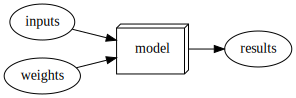

In [5]:
gv('model[shape=box3d width=1 height=0.7]inputs->model->results; weights->model')

14. Why is it hard to understand why a deep learning model makes a particular prediction?
    - not obvious what the rules are/ patterns it picks up.
15. What is the name of the theorem that shows that a neural network can solve any mathematical problem to any level of accuracy?
    - The universal approximation theorem shows a neural network can theoretically solve any problem
16. What do you need in order to train a model?
    - data. duh.
    - labels, maybe
17. How could a feedback loop impact the rollout of a predictive policing model?
    - reinforce/ bake in existing biases
18. Do we always have to use 224×224-pixel images with the cat recognition model?
    - 'reasons'. Good trade-off between resources and performance.
19. What is the difference between classification and regression?
    - yes/no vs how much?
20. What is a validation set? What is a test set? Why do we need them?
    - validation set is how we evaluate each epoch of our model. 
    - test is how we judge our whole process. Once a model is built and trained, we check it in a 'production like' state, with unseen test data.
21. What will fastai do if you don't provide a validation set?
    - it randomly samples a 20% validation set
22. Can we always use a random sample for a validation set? Why or why not?
    - random may not be valid. We may need to stratify if our samples may be non-representative of the real world vs model.
23. What is overfitting? Provide an example.
    - Overfitting is not generalising well. Predicting I am a late 20s man with a beard called Jack instead of - it's a man.
24. What is a metric? How does it differ from "loss"?
    - loss - trains the model, metric helps us judge the model.
25. How can pretrained models help?
    - they are pre-trained, most of the work is done
26. What is the "head" of a model?
    - the last layer/ bit that you stick on a pre-trained model.
27. What kinds of features do the early layers of a CNN find? How about the later layers?
    - early layers pick up corners, angles and gradients. Later layers pick up complex patterns such as eyes, wheels and faces.
28. Are image models only useful for photos?
    - not if you can model your problem as an image
29. What is an "architecture"?
    - the structure of a model
30. What is segmentation?
    - splitting an image into different classes
31. What is y_range used for? When do we need it?
    - when we are regressing into a range, y_range clips our predictions to make sense (avoiding negatives in a positive space)
32. What are "hyperparameters"?
    - extra features which help the model choose the best parameters
33. What's the best way to avoid failures when using AI in an organization?
    - always test on unseen data.